In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Datasets\\Insurance\\Train_Data.csv")
df.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64

In [4]:
df.describe()

,age,bmi,children,charges
count,3630.000000,3630.000000,3630.000000,3630.000000
mean,38.887036,30.629652,2.503581,12784.808644
std,12.151029,5.441307,1.712568,10746.166743
min,18.000000,15.960000,0.000000,1121.873900
25%,29.000000,26.694526,1.000000,5654.818262
50%,39.170922,30.200000,3.000000,9443.807222
75%,48.343281,34.100000,4.000000,14680.407505
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
# In order to tell the total number of smokers,north east people,sex(gender)
columns = ['smoker','sex','region']
def unique_value(column,df=df):
    print(df[column].value_counts().head(10))

In [6]:
for column in columns:
    unique_value(column=column)

no     3070
yes     560
Name: smoker, dtype: int64
male      2029
female    1601
Name: sex, dtype: int64
southeast    1021
northwest     911
southwest     850
northeast     848
Name: region, dtype: int64


In [7]:
corr = df.corr()
print(corr)

               age       bmi  children   charges
age       1.000000  0.143527 -0.061076  0.299692
bmi       0.143527  1.000000 -0.041996  0.211325
children -0.061076 -0.041996  1.000000 -0.075089
charges   0.299692  0.211325 -0.075089  1.000000


Text(0.5, 1.0, 'A heatmap to show correlation in our dataset')

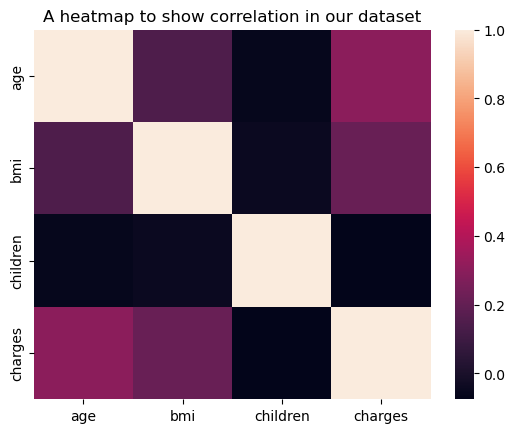

In [8]:
sns.heatmap(corr)
plt.title('A heatmap to show correlation in our dataset')

Text(0.5, 1.0, 'A Pairplot with the smoker hue')

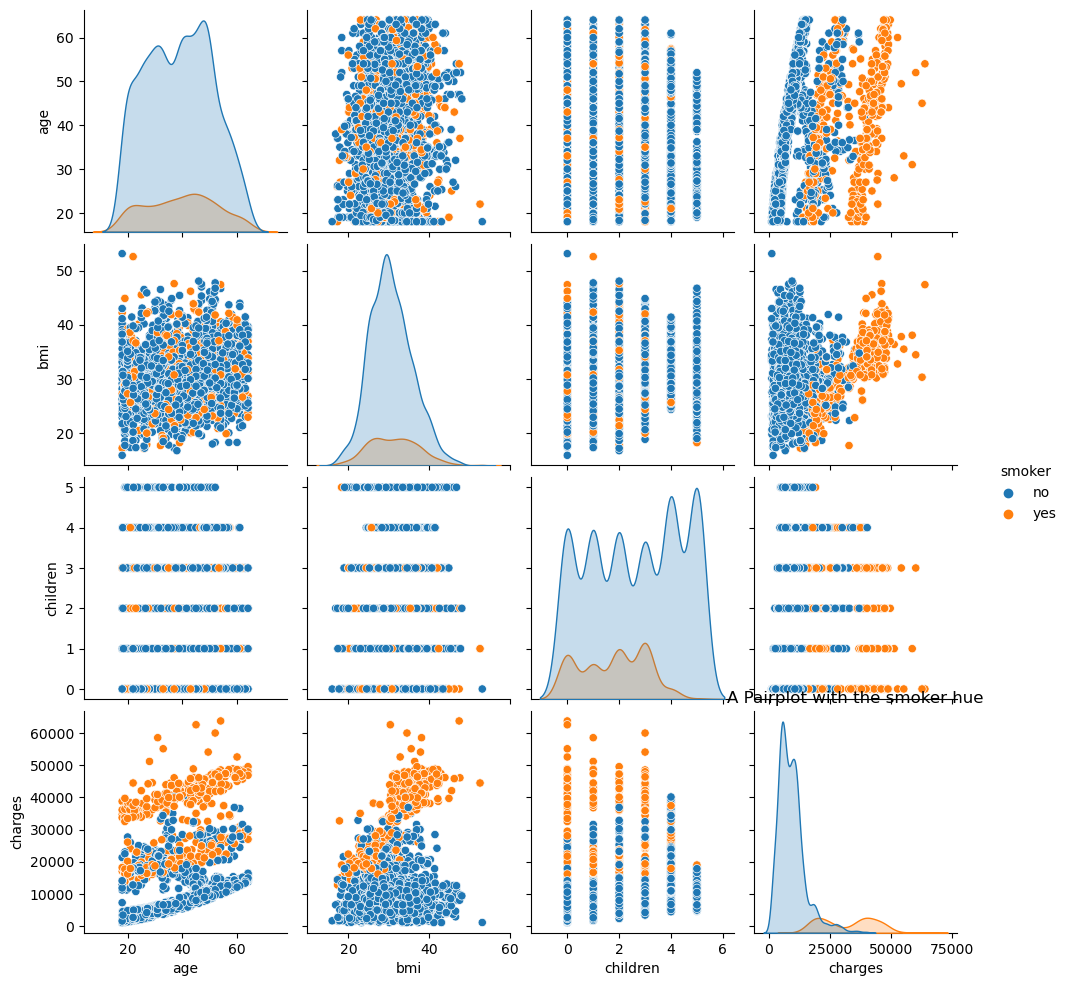

In [9]:
sns.pairplot(df,hue='smoker')
plt.title('A Pairplot with the smoker hue')

Text(0.5, 1.0, 'A Pairplot with the region hue')

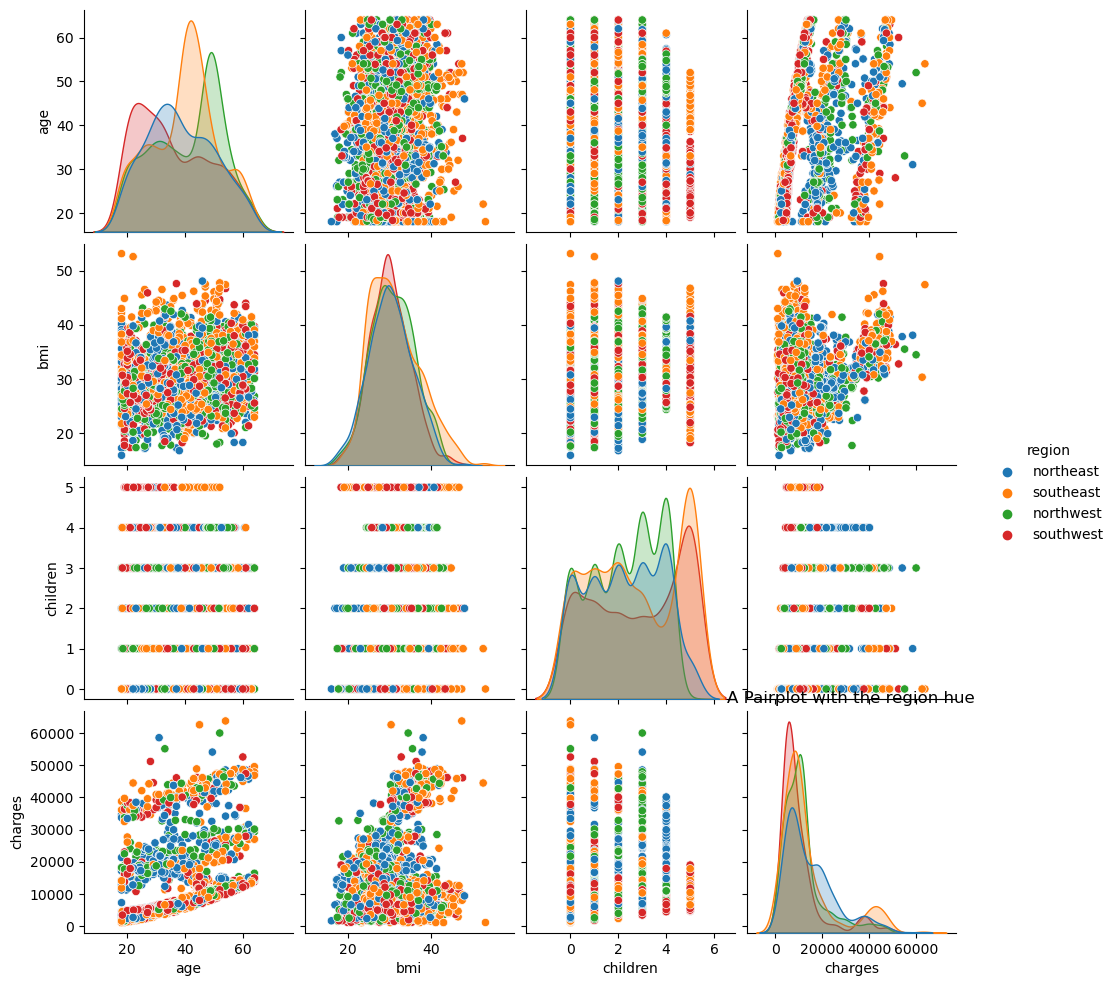

In [10]:
sns.pairplot(df,hue='region')
plt.title('A Pairplot with the region hue')

'North Westernerns have advanced in Age compared to the South Westerners'

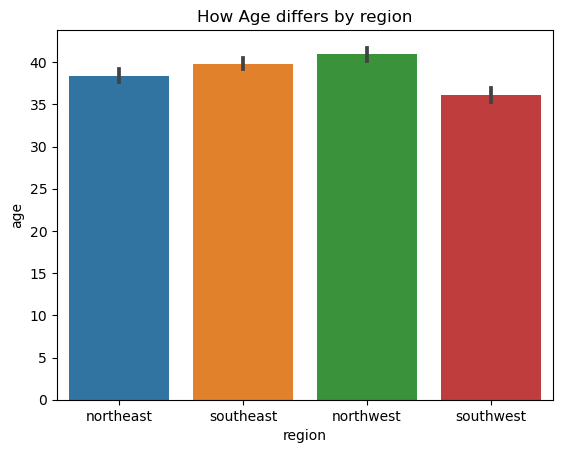

In [11]:
# Creating a Barplot for all the Regions with respect to Age
sns.barplot(x='region',y='age',data=df)
plt.title('How Age differs by region')
"""North Westernerns have advanced in Age compared to the South Westerners"""

Text(0.5, 1.0, 'How Bmi differs by region')

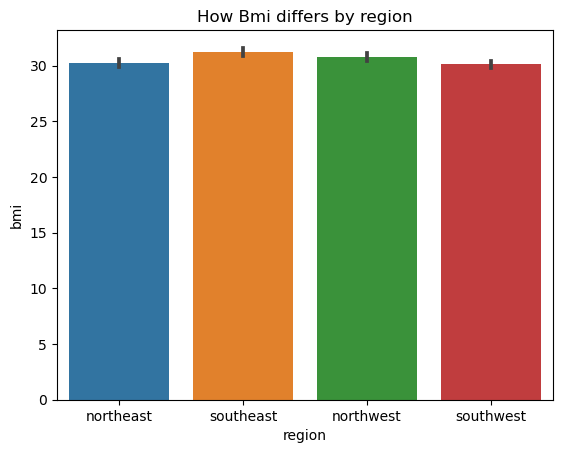

In [12]:
sns.barplot(x='region',y='bmi',data=df)
plt.title('How Bmi differs by region')

In [13]:
df.columns

Index(['age', 'sex', 'bmi', 'smoker', 'region', 'children', 'charges'], dtype='object')

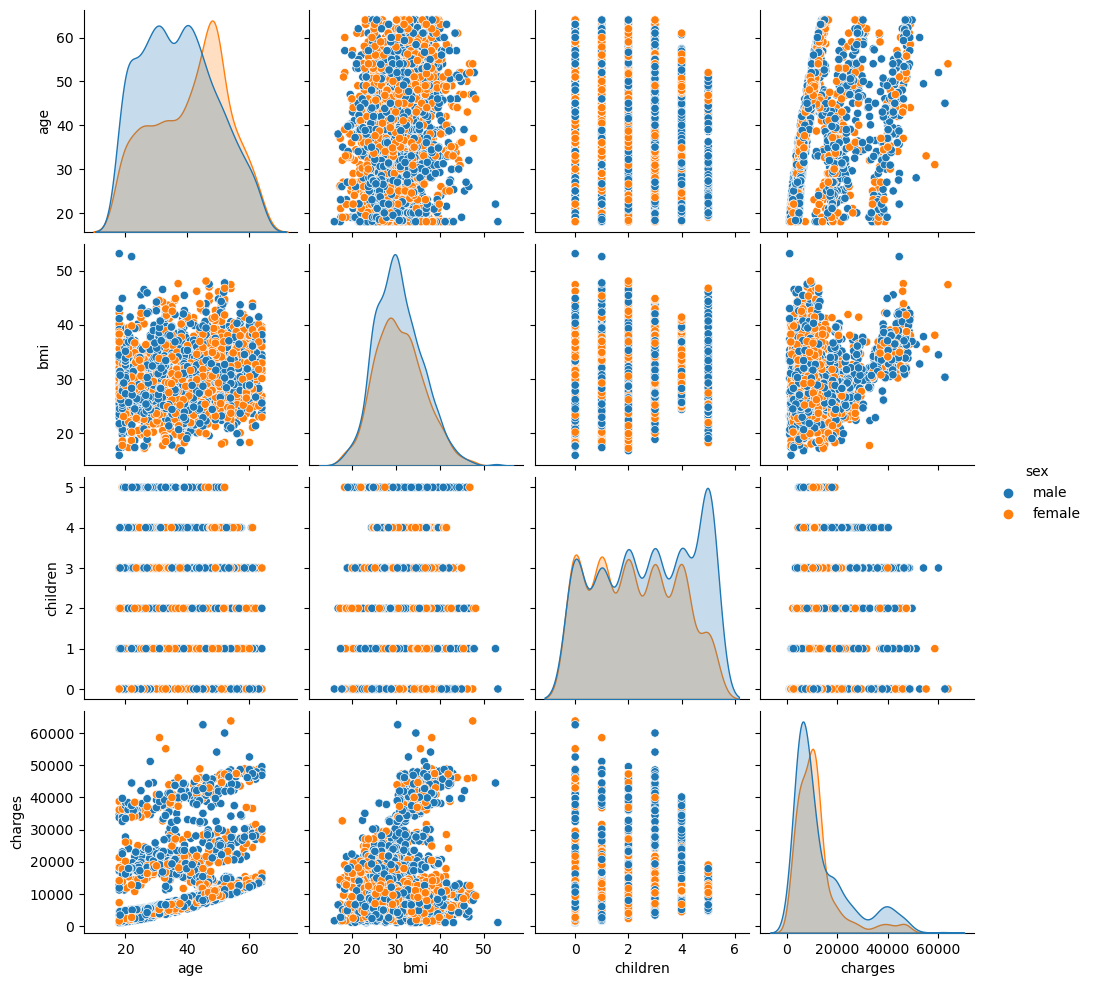

In [14]:
sns.pairplot(df,hue='sex')

Text(0.5, 1.0, 'How  Charges differ by Sex')

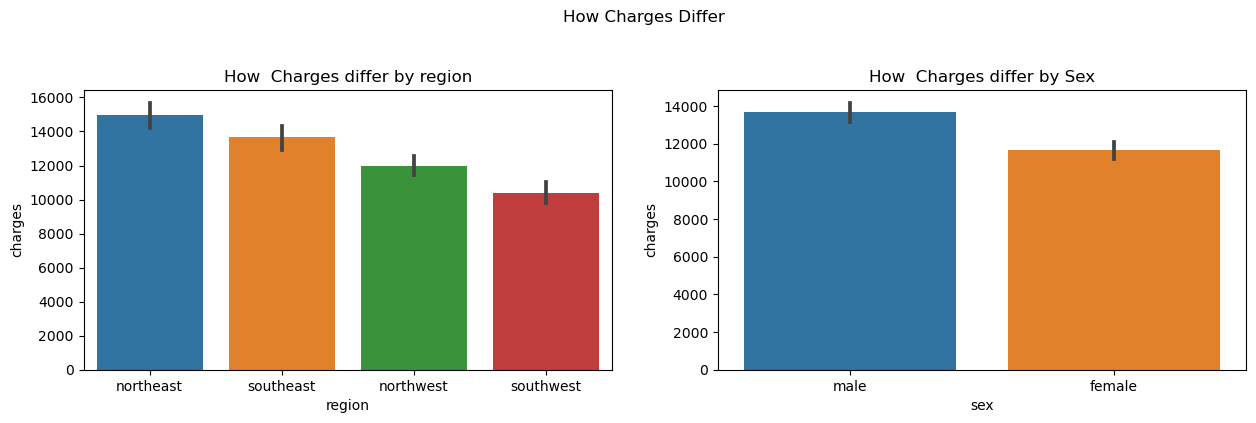

In [15]:
fig = plt.figure(figsize=(15,8))
fig.suptitle('How Charges Differ ')
plt.subplot(2,2,1)
sns.barplot(x='region',y='charges',data=df)
plt.title('How  Charges differ by region')
plt.subplot(2,2,2)
sns.barplot(x='sex',y='charges',data=df)
plt.title('How  Charges differ by Sex')

In [16]:
df['age'] = np.round(df.age)

In [17]:
df.age.head()

0    21.0
1    37.0
2    18.0
3    37.0
4    58.0
Name: age, dtype: float64

In [18]:
df['charges'] = np.round(df.charges)

C:\Users\EDGAR MUYALE DAVIES\anaconda3\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

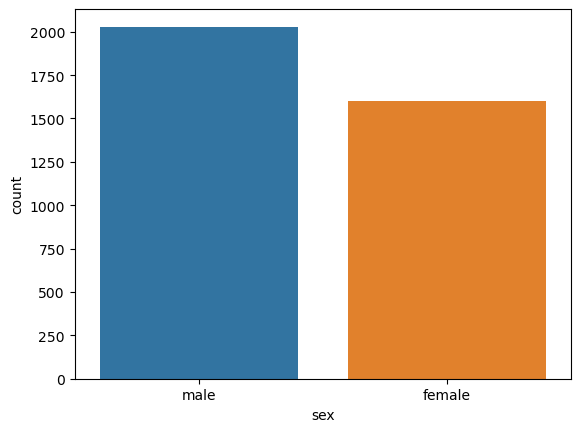

In [19]:
sns.countplot(df.sex)

In [20]:
df['region'] = df['region'].replace(to_replace='northeast',value=1)
df['region'] = df['region'].replace(to_replace='northwest',value=2)
df['region'] = df['region'].replace(to_replace='southeast',value=3)
df['region'] = df['region'].replace(to_replace='southwest',value=4)

In [21]:
df['sex'] = df['sex'].replace(to_replace= 'male',value=1)
df['sex'] = df['sex'].replace(to_replace= 'female',value=2)


In [22]:
df['smoker'] = df['smoker'].replace(to_replace='yes',value=1)
df['smoker'] = df['smoker'].replace(to_replace='no',value=0) 

In [23]:
df.corr()

,age,sex,bmi,smoker,region,children,charges
age,1.000000,0.152059,0.143534,0.026157,-0.071482,-0.060885,0.299100
sex,0.152059,1.000000,0.011215,-0.078318,-0.019407,-0.147182,-0.092703
bmi,0.143534,0.011215,1.000000,0.045921,0.003269,-0.041996,0.211325
smoker,0.026157,-0.078318,0.045921,1.000000,-0.058107,-0.183507,0.777175
region,-0.071482,-0.019407,0.003269,-0.058107,1.000000,0.133113,-0.117636
children,-0.060885,-0.147182,-0.041996,-0.183507,0.133113,1.000000,-0.075088
charges,0.299100,-0.092703,0.211325,0.777175,-0.117636,-0.075088,1.000000


In [24]:
df.region

0       1
1       3
2       3
3       1
4       3
       ..
3625    2
3626    3
3627    4
3628    3
3629    1
Name: region, Length: 3630, dtype: int64

In [25]:
X =  df.drop(['charges','children'],axis=1)
y =  df['charges']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=101,test_size=0.2)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,mean_squared_error
frc = RandomForestClassifier()
frc.fit(X_train,y_train)
predictions = frc.predict(X_test)
print(mean_squared_error(y_test,predictions))

30292798.555096418


In [27]:
from sklearn.ensemble import  RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
forest_pred = rfr.predict(X_test)
print(mean_squared_error(y_test,forest_pred))


14286853.644058742


In [28]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
tree_predict = tree.predict(X_test)
print(mean_squared_error(y_test,tree_predict))

66858510.775482096


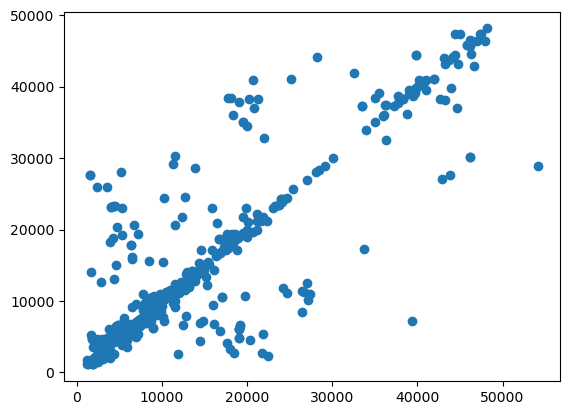

In [29]:
plt.scatter(y_test,predictions)

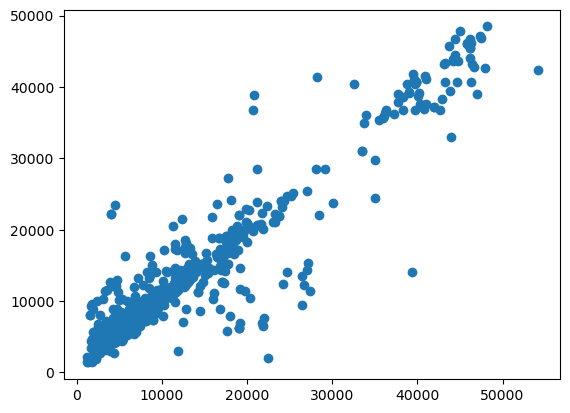

In [30]:
plt.scatter(y_test,forest_pred)

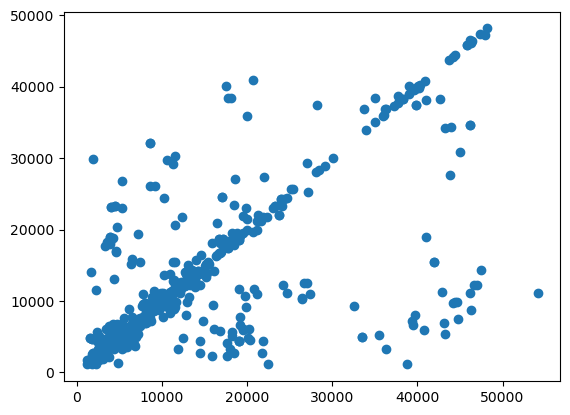

In [31]:
plt.scatter(y_test,tree_predict)